In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [18]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [19]:
#num of classes
K= len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [20]:
# the data is only 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [21]:
#Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i) # x = f(i) 같은 표기법....

#64, 128 추가해보기.
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

#Flatten()
x = Flatten()(x)

#Dropout()
x = Dropout(0.2)(x)

#Dense() 레이어를 써서 -> softmax 사용하기
# dense() 레이어는 모든것이 연결되어 있는 fully connected
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)


model = Model(i,x)
model.summary()

# stride 2 는 사이즈가 줄어든다. signoid로 바꾸든가, stride 빼든가(그러면 오래 걸리겠지. )
# 싸이킷런 api 에는 그리드 서치 cv? 는 최적의 파라미터를 찾아준다. 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2626

In [25]:
# optimizer=adam, loss=categorical_crossentropy, metrics=accuracy 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) #sparse : categorical_crossentropy 를 거쳐서 나오는 값을 정수로 바꿔서 출력해라. 

result = model.fit(x_train, y_train,
                  validation_data=(x_test,y_test),
                   epochs=15)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 29s 484us/sample - loss: 0.5221 - accuracy: 0.8080 - val_loss: 0.4088 - val_accuracy: 0.8501
Epoch 2/15
60000/60000 [==============================] - 29s 483us/sample - loss: 0.3609 - accuracy: 0.8640 - val_loss: 0.3394 - val_accuracy: 0.8765
Epoch 3/15
60000/60000 [==============================] - 25s 424us/sample - loss: 0.3118 - accuracy: 0.8823 - val_loss: 0.3239 - val_accuracy: 0.8843
Epoch 4/15
60000/60000 [==============================] - 28s 464us/sample - loss: 0.2791 - accuracy: 0.8954 - val_loss: 0.3003 - val_accuracy: 0.8897
Epoch 5/15
60000/60000 [==============================] - 28s 470us/sample - loss: 0.2527 - accuracy: 0.9049 - val_loss: 0.2990 - val_accuracy: 0.8886
Epoch 6/15
60000/60000 [==============================] - 28s 469us/sample - loss: 0.2331 - accuracy:

In [ ]:
#Plot loss per iteration
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accruacy')
plt.legend()

#val 이 정확할 수 도 있음. 
#loss 는 잘 되는데, acc는 왜 안나오는지 모르겠다. 

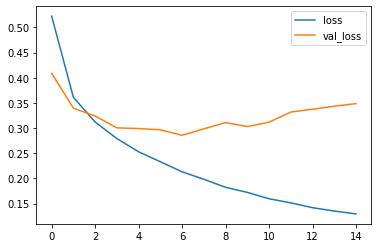

In [69]:
#Plot loss per iteration
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

#val 이 정확할 수 도 있음. 
#loss 는 잘 되는데, acc는 왜 안나오는지 모르겠다. 

Consusion matrix, without normalization
[[850   1  23  21   2   1  91   0  10   1]
 [  3 978   0  12   3   0   2   0   2   0]
 [ 18   0 864  14  38   0  64   0   2   0]
 [ 10   7  17 909  34   0  23   0   0   0]
 [  0   1  73  25 827   0  70   0   4   0]
 [  0   0   0   0   0 964   0  18   0  18]
 [106   0  68  24  79   1 708   0  14   0]
 [  0   0   0   0   0  10   0 949   0  41]
 [  2   1   5   2   4   3   8   1 974   0]
 [  1   0   0   0   0   4   0  25   0 970]]


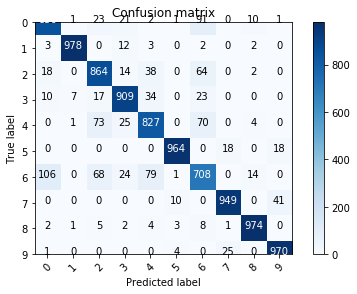

In [31]:
from sklearn.metrics import confusion_matrix
import itertools
def plt_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  '''
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt_confusion_matrix(cm, list(range(10)))


In [55]:
# Label mapping
labels = '''
T-shirt/top
Trouser/pants
Pullover_shirt
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()
print(labels)


['T-shirt/top', 'Trouser/pants', 'Pullover_shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle', 'boot']


In [56]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
print(misclassified_idx)

[  17   23   25 ... 9977 9981 9991]


In [66]:
# show image
temp_idx = np.random.choice(misclassified_idx
                           )
print(temp_idx)

3568


Text(0.5, 1.0, 'True label: Coat, Predicted: Shirt')

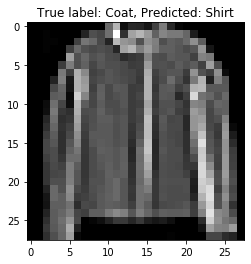

In [67]:
plt.imshow(x_test[temp_idx].reshape((28,28)),'gray')
plt.title("True label: %s, Predicted: %s" %(labels[y_test[temp_idx]], labels[p_test[temp_idx]]))